In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = '' 
os.environ['KAGGLE_KEY'] = ''
!kaggle datasets download -d furcifer/bangla-newspaper-dataset

 98% 1.01G/1.03G [00:07<00:00, 126MB/s]
100% 1.03G/1.03G [00:07<00:00, 139MB/s]


In [ ]:
!unzip /content/bangla-newspaper-dataset.zip

Archive:  /content/bangla-newspaper-dataset.zip
  inflating: data/data.json          
  inflating: data_v2/data_v2.json    


In [ ]:
!wget https://www.omicronlab.com/download/fonts/kalpurush.ttf -P /tmp/font

--2021-03-15 00:34:00--  https://www.omicronlab.com/download/fonts/kalpurush.ttf
Resolving www.omicronlab.com (www.omicronlab.com)... 172.104.46.32
Connecting to www.omicronlab.com (www.omicronlab.com)|172.104.46.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 314592 (307K) [application/octet-stream]
Saving to: ‘/tmp/font/kalpurush.ttf’

kalpurush.ttf       100%[===================>] 307.22K   466KB/s    in 0.7s    

2021-03-15 00:34:02 (466 KB/s) - ‘/tmp/font/kalpurush.ttf’ saved [314592/314592]



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re
import nltk 
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
fm.fontManager.addfont('/tmp/font/kalpurush.ttf')
plt.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'kalpurush',
        'mathtext.fontset': 'stix',
        'font.size': 22
    }
)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Pre Processing political Tag with pandas

In [ ]:
data=pd.read_json('/content/data_v2/data_v2.json',encoding='utf8')

In [ ]:
data.head(10)

,author,category,category_bn,published_date,modification_date,tag,comment_count,title,url,content
0,গাজীপুর প্রতিনিধি,bangladesh,বাংলাদেশ,"০৪ জুলাই ২০১৩, ২৩:২৬","০৪ জুলাই ২০১৩, ২৩:২৭",[গাজীপুর],0,"কালিয়াকৈরে টিফিন খেয়ে ৫০০ শ্রমিক অসুস্থ, বিক...",http://www.prothom-alo.com/bangladesh/article/...,গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায়...
1,অনলাইন ডেস্ক,sports,খেলা,"০৪ জুলাই ২০১৩, ২৩:০৯","০৪ জুলাই ২০১৩, ২৩:১১",[টেনিস],0,সেমিফাইনাল বাধাও পেরিয়ে গেলেন লিসিকি,http://www.prothom-alo.com/sports/article/19028,এবারের উইম্বলডনটা স্মরণীয় করে রাখার মিশনেই যে...
2,নিজস্ব প্রতিবেদক,bangladesh,বাংলাদেশ,"০৪ জুলাই ২০১৩, ২২:২৫","০৪ জুলাই ২০১৩, ২৩:১২",[রাজনীতি],0,সংসদে খালেদার অভিযোগের জবাব দিয়েছে ভারত,http://www.prothom-alo.com/bangladesh/article/...,জাতীয় সংসদে বিএনপি চেয়ারপারসন ও বিরোধীদলীয় ...
3,অনলাইন ডেস্ক,technology,বিজ্ঞান ও প্রযুক্তি,"০৪ জুলাই ২০১৩, ২১:৩৭","০৪ জুলাই ২০১৩, ২১:৪৫",[গবেষণা],0,পাসওয়ার্ড ভুলে যান!,http://www.prothom-alo.com/technology/article/...,সহজ পাসওয়ার্ডের কারণে অনলাইন অ্যাকাউন্ট সহজেই...
4,অনলাইন ডেস্ক,technology,বিজ্ঞান ও প্রযুক্তি,"০৪ জুলাই ২০১৩, ২১:৩৫","০৪ জুলাই ২০১৩, ২১:৩৭",[কম্পিউটার],0,চলে গেলেন মাউস উদ্ভাবক,http://www.prothom-alo.com/technology/article/...,কম্পিউটার মাউসের উদ্ভাবক ডগলাস অ্যাঙ্গেলবার্ট ...
5,অনলাইন ডেস্ক,technology,বিজ্ঞান ও প্রযুক্তি,"০৪ জুলাই ২০১৩, ২১:৩১","০৪ জুলাই ২০১৩, ২১:৩৫",[মোবাইল ফোন],0,অ্যান্ড্রয়েডের বড় ত্রুটির খোঁজ,http://www.prothom-alo.com/technology/article/...,গুগলের মোবাইল অপারেটিং সিস্টেম অ্যান্ড্রয়েডের...
6,চাঁদপুর প্রতিনিধি,bangladesh,বাংলাদেশ,"০৪ জুলাই ২০১৩, ২১:২৩","০৪ জুলাই ২০১৩, ২১:৩৭",[রাজনীতি],0,খালেদা দুষ্টু কথা বলেছেন: স্বরাষ্ট্রমন্ত্রী,http://www.prothom-alo.com/bangladesh/article/...,যুক্তরাষ্ট্রের বাজারে জিএসপি-সুবিধা বন্ধ হওয়া...
7,নিজস্ব প্রতিবেদক,bangladesh,বাংলাদেশ,"০৪ জুলাই ২০১৩, ২১:১২","০৪ জুলাই ২০১৩, ২১:১৫",-1,0,আরও ১১টি বিমা কোম্পানি অনুমোদন পেল,http://www.prothom-alo.com/bangladesh/article/...,১১টি বিমা কোম্পানিকে লাইসেন্সের অনুমোদন দিয়েছ...
8,নিজস্ব প্রতিবেদক,bangladesh,বাংলাদেশ,"০৪ জুলাই ২০১৩, ২১:১১","০৪ জুলাই ২০১৩, ২১:১২",[সিলেট],0,সিএনজি স্টেশনে কাল থেকে অনির্দিষ্টকালের ধর্মঘট,http://www.prothom-alo.com/bangladesh/article/...,ম্যাজিস্ট্রেটের মাধ্যমে সিলেটে সিএনজি স্টেশনের...
9,অনলাইন প্রতিবেদক,entertainment,বিনোদন,"০৪ জুলাই ২০১৩, ২১:০৭","১১ ফেব্রুয়ারি ২০১৮, ১৪:১৮",[বাংলা গান],১,ওয়েবসাইটে মমতাজ-বাপ্পার গান (অডিও),http://www.prothom-alo.com/entertainment/artic...,একক-মিশ্র অ্যালবামে অনেক গানই করেছেন বাপ্পা মজ...


Saving Files For Language Identification

In [ ]:
data_to_be_saved=data['content'][:3000]
data_to_be_saved.to_csv('/content/drive/MyDrive/AI/bangla_text.csv')



---



In [ ]:
def tagModify(tags):
  for tag in tags:
    if(tag=='রাজনীতি'):
       return True;
  else:
     return False;

In [ ]:
data['political']= data['tag'].apply(tagModify)

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


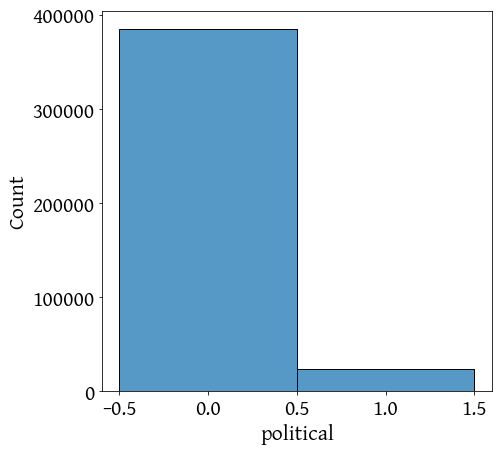

In [ ]:
plt.figure(figsize=(7,7))
sns.histplot(data.political,discrete=True)

In [ ]:
data=data.drop(columns=['author','category','category_bn','published_date','modification_date','tag','comment_count','title','url'])

In [ ]:
data=data.reset_index(drop=True)
data.head()

,content,political
0,গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায়...,False
1,এবারের উইম্বলডনটা স্মরণীয় করে রাখার মিশনেই যে...,False
2,জাতীয় সংসদে বিএনপি চেয়ারপারসন ও বিরোধীদলীয় ...,True
3,সহজ পাসওয়ার্ডের কারণে অনলাইন অ্যাকাউন্ট সহজেই...,False
4,কম্পিউটার মাউসের উদ্ভাবক ডগলাস অ্যাঙ্গেলবার্ট ...,False


In [ ]:
label_encoder=preprocessing.LabelEncoder()
data['category_target']=label_encoder.fit_transform(data['political'])
data.head()

,content,political,category_target
0,গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায়...,False,0
1,এবারের উইম্বলডনটা স্মরণীয় করে রাখার মিশনেই যে...,False,0
2,জাতীয় সংসদে বিএনপি চেয়ারপারসন ও বিরোধীদলীয় ...,True,1
3,সহজ পাসওয়ার্ডের কারণে অনলাইন অ্যাকাউন্ট সহজেই...,False,0
4,কম্পিউটার মাউসের উদ্ভাবক ডগলাস অ্যাঙ্গেলবার্ট ...,False,0


In [ ]:
data.to_csv('/content/political_post_data.csv')

In [ ]:
!pip install -U scikit-learn
!pip install -U pickle5

     |████████████████████████████████| 22.3MB 2.0MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


     |████████████████████████████████| 133kB 3.9MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219245 sha256=9e93ff51cfb53f38e6f3bc9e006c4d1a30138982ba595c016cb3e9a5233c689b
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [ ]:
data=pd.read_csv('/content/political_post_data.csv')[:30000]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data=data.drop('Unnamed: 0',axis=1)

In [ ]:
data=data.dropna()

In [ ]:
data['content'].isnull().any()

False

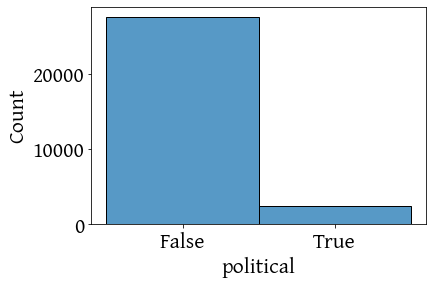

In [ ]:
sns.histplot(data['political'],discrete=True)

In [ ]:
data.head()

,content,political,category_target
0,গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায়...,False,0.0
1,এবারের উইম্বলডনটা স্মরণীয় করে রাখার মিশনেই যে...,False,0.0
2,জাতীয় সংসদে বিএনপি চেয়ারপারসন ও বিরোধীদলীয় ...,True,1.0
3,সহজ পাসওয়ার্ডের কারণে অনলাইন অ্যাকাউন্ট সহজেই...,False,0.0
4,কম্পিউটার মাউসের উদ্ভাবক ডগলাস অ্যাঙ্গেলবার্ট ...,False,0.0


In [ ]:
data['index'] = data.index

In [ ]:
data.head()

,content,political,category_target,index
0,গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায়...,False,0.0,0
1,এবারের উইম্বলডনটা স্মরণীয় করে রাখার মিশনেই যে...,False,0.0,1
2,জাতীয় সংসদে বিএনপি চেয়ারপারসন ও বিরোধীদলীয় ...,True,1.0,2
3,সহজ পাসওয়ার্ডের কারণে অনলাইন অ্যাকাউন্ট সহজেই...,False,0.0,3
4,কম্পিউটার মাউসের উদ্ভাবক ডগলাস অ্যাঙ্গেলবার্ট ...,False,0.0,4


In [ ]:
!git clone https://github.com/banglakit/bengali-stemmer

Cloning into 'bengali-stemmer'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 94 (delta 5), reused 16 (delta 4), pack-reused 69
Unpacking objects: 100% (94/94), done.


In [ ]:
!mv /content/bengali-stemmer /content/bengali

In [ ]:
from bengali.bengali_stemmer.rafikamal2014 import RafiStemmer
stemmer=RafiStemmer()

In [ ]:
print(stemmer.stem_word('অনেকেই'))

অন


In [ ]:
!wget https://raw.githubusercontent.com/stopwords-iso/stopwords-bn/master/raw/ranksnl-bengali.txt

--2021-03-15 00:37:18--  https://raw.githubusercontent.com/stopwords-iso/stopwords-bn/master/raw/ranksnl-bengali.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4991 (4.9K) [text/plain]
Saving to: ‘ranksnl-bengali.txt.1’

ranksnl-bengali.txt 100%[===================>]   4.87K  --.-KB/s    in 0s      

2021-03-15 00:37:18 (48.9 MB/s) - ‘ranksnl-bengali.txt.1’ saved [4991/4991]



In [ ]:
bn_stopwords=pd.read_csv('/content/ranksnl-bengali.txt',header=None)[0]
bn_stopwords

0       অবশ্য
1        অনেক
2       অনেকে
3      অনেকেই
4       অন্তত
        ...  
358      চায়
359     চেয়ে
360       মোট
361    যথেষ্ট
362        টি
Name: 0, Length: 363, dtype: object

In [ ]:
def executionTime(func):
  import time
  def wrapper(*args,**kwargs):
      start_time = time.time()
      result=func(*args,**kwargs)
      print("Execution time %s ms " % ((time.time() - start_time)*1000))
      return result
  return wrapper

In [ ]:
bangla_stop_words_map={}
for w in bn_stopwords:
  bangla_stop_words_map[w]=True


def process_text(text):
  # filtered_sequence=[stem_verb(w) for w in word_tokens]
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
  begali_digits=re.compile(u'[\u09E6-\u09EF]+',flags=re.UNICODE)
  puntuation=re.compile(u'[.,!?\\-\u0964]',flags=re.UNICODE)
  text=puntuation.sub(r'',text)
  text=begali_digits.sub(r'',text)
  text=emoji_pattern.sub(r'', text)
  text=english_pattern.sub(r'', text)
  text=re.sub(r'\s+', ' ', text)
  word_tokens=word_tokenize(text)
  filtered_sequence_without_stopwords=[w  for w in word_tokens if not bangla_stop_words_map.get(w,False)]
  filtered_sequence=[stemmer.stem_word(w) for w in filtered_sequence_without_stopwords]
  text=' '.join(filtered_sequence)
  return text

In [ ]:
sentence='অক্সফোর্ড বিশ্ববিদ্যালয় ও অ্যাস্ট্রাজেনেকার উদ্ভাবিত করোনভাইরাসের (কোভিড-১৯) jdsfsf টিকা নেওয়ার সঙ্গে মানবদেহে রক্ত জমাট বাঁধার কোনো যোগসূত্র সেই। বিশ্ব স্বাস্থ্য সংস্থা আজ শুক্রবার এ কথা জানিয়েছে। একই সঙ্গে এই টিকাদান কর্মসূচি চালিয়ে যাওয়ার জন্য সব দেশের প্রতি আহ্বান জানিয়েছে সংস্থাটি।  ব্রিটিশ সংবাদমাধ্যম ইনডিপেনডেন্ট-এর প্রতিবেদনে এ কথা  বলা হয়েছে। বিশ্ব স্বাস্থ্য সংস্থা বলছে, কয়েক দিন ধরে এমন কথা শোনা যাচ্ছে যে অক্সফোর্ডের টিকা গ্রহণ করার পর কারও কারও শরীরে রক্ত জমা বাঁধছে।  কিন্তু অক্সফোর্ডের টিকা নিলে মানুষের শরীরের রক্ত জমা বাঁধবে—এমন কোনো আভাস মেলেনি। ডেনমার্ক, নরওয়ে ও আইসল্যান্ডসহ কয়েকটি দেশ চলতি সপ্তাহে অক্সফোর্ডের টিকার ব্যবহার স্থগিত করে দেয়। টিকা নেওয়ার পর কিছু মানুষের ক্ষেত্রে রক্ত জমাট বাঁধার ঘটনা ঘটে বলেও জানানো হয়।'
print(process_text(sentence))

অক্সফোর্ড বিশ্ববিদ্যাল অ্যাস্ট্রাজেনেক উদ্ভাবিত করোনভাইরাস ( কোভিড ) টিকা নেওয় মানবদেহ রক্ত জমাট বাঁধ যোগসূত্র বিশ্ব স্বাস্থ্য সংস্থা শুক্রব কথা জানি টিকাদান কর্মসূচি চালি যাওয় দেশ আহ্বান জানি সংস্থা ব্রিটিশ সংবাদমাধ্যম ইনডিপেনডেন্টএর প্রতিবেদন কথা হ বিশ্ব স্বাস্থ্য সংস্থা বল কয়েক দিন কথা শোনা অক্সফোর্ড টিকা গ্রহণ শরীর রক্ত জমা বাঁধ অক্সফোর্ড টিকা নিল মানুষ শরীর রক্ত জমা বাঁধবে—এমন আভাস মেলেনি ডেনমার্ক নরও আইসল্যান্ডসহ কয়েক দেশ চলতি সপ্তাহ অক্সফোর্ড টিক স্থগিত দে টিকা নেওয় মানুষ রক্ত জমাট বাঁধ ঘটনা ঘট বল হ


In [ ]:
data['Text_parsed']=data['content'].apply(process_text) 

In [ ]:
data.to_csv('/content/political_post_data_parsed.csv')

In [ ]:
data.head(50)

,content,political,category_target,index,Text_parsed
0,গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায়...,False,0.0,0,গাজীপুর কালিয়াকৈর উপজেল তেলিরচালা এলাকায় বৃহ...
1,এবারের উইম্বলডনটা স্মরণীয় করে রাখার মিশনেই যে...,False,0.0,1,এবার উইম্বলডন স্মরণীয় রাখ মিশন নেম সাবিনা লিস...
2,জাতীয় সংসদে বিএনপি চেয়ারপারসন ও বিরোধীদলীয় ...,True,1.0,2,জাতীয় সংসদ বিএনপি চেয়ারপারসন বিরোধীদলীয় নেত...
3,সহজ পাসওয়ার্ডের কারণে অনলাইন অ্যাকাউন্ট সহজেই...,False,0.0,3,সহজ পাসওয়ার্ড কারণ অনলাইন অ্যাকাউন্ট সহজ হ্যা...
4,কম্পিউটার মাউসের উদ্ভাবক ডগলাস অ্যাঙ্গেলবার্ট ...,False,0.0,4,কম্পিউট মাউস উদ্ভাবক ডগলাস অ্যাঙ্গেলবার্ট জুলা...
5,গুগলের মোবাইল অপারেটিং সিস্টেম অ্যান্ড্রয়েডের...,False,0.0,5,গুগল মোবাইল অপারেটিং সিস্টেম অ্যান্ড্রয়েড বড়...
6,যুক্তরাষ্ট্রের বাজারে জিএসপি-সুবিধা বন্ধ হওয়া...,True,1.0,6,যুক্তরাষ্ট্র বাজার জিএসপিসুবিধা বন্ধ প্রসঙ্গ স...
7,১১টি বিমা কোম্পানিকে লাইসেন্সের অনুমোদন দিয়েছ...,False,0.0,7,বিমা কোম্পানি লাইসেন্স অনুমোদন বিমা উন্নয়ন নি...
8,ম্যাজিস্ট্রেটের মাধ্যমে সিলেটে সিএনজি স্টেশনের...,False,0.0,8,ম্যাজিস্ট্রেট সিলেট সিএনজি স্টেশন এক মালিক লাঞ...
9,একক-মিশ্র অ্যালবামে অনেক গানই করেছেন বাপ্পা মজ...,False,0.0,9,এককমিশ্র অ্যালবাম গান বাপ্পা মজুমদ মমতাজ পাশাপ...


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(data['Text_parsed'],
                                               data['category_target'],
                                               test_size=.2)

In [ ]:
X_train[0:5]

13686    বাঁশির সুর তোল প্রতিজ্ঞায় বড়সড় ধাক্কা ত পার...
2945     ব্রায়ান লা প্রায় রাত ঘুম কেড় নিত অস্ট্রেলিয...
26489    তথ্য বিনোদনগিট নেভ লাইজসাজ্জাদ আরেফিন গিট গাইড...
2535     ট্রেন আগ সময়সূচি পুনর্বহাল দা গত শনিব কুড়িগ্...
27009    পাকিস্তান নারীশিক্ষা অধিকারকর্মী মালালা ইউসুফজ...
Name: Text_parsed, dtype: object

In [ ]:
print(f'Train size: {X_train.shape}')
print(f'Test size: {X_test.shape}')

Train size: (23992,)
Test size: (5999,)


In [ ]:
import pickle
import time 

In [ ]:
ngram_range=(1,3)
min_df=10
max_df=1.00
max_features=200

In [ ]:
tfidf=TfidfVectorizer(encoding='utf-8',
                      ngram_range=ngram_range,
                      stop_words=None,
                      lowercase=False,
                      max_df=max_df,
                      min_df=min_df,
                      max_features=max_features,
                      norm='l2',
                      sublinear_tf=True)

In [ ]:
tfidf.fit(X_train)

TfidfVectorizer(lowercase=False, max_features=200, min_df=10,
                ngram_range=(1, 3), sublinear_tf=True)

In [ ]:
features_train=tfidf.transform(X_train).toarray()
labels_train=Y_train

In [ ]:
features_test=tfidf.transform(X_test).toarray()
labels_test=Y_test

In [ ]:
pickle.dump(tfidf, open("/content/drive/MyDrive/AI/tfidf_pickle.pkl", "wb"))

In [ ]:
start_time = time.time()
tf_file = pickle.load(open("/content/drive/MyDrive/AI/tfidf_pickle.pkl", 'rb'))

tfidf_new=TfidfVectorizer(encoding='utf-8',
                ngram_range=ngram_range,
                stop_words=None,
                lowercase=False,
                max_df=max_df,
                min_df=min_df,
                max_features=max_features,
                norm='l2',
                vocabulary = tf_file.vocabulary_,
                sublinear_tf=True)
print("Execution time %s ms " % ((time.time() - start_time)*1000))

Execution time 1392.2944068908691 ms 


In [ ]:
print(f'Train size: {features_train.shape}')

Train size: (23992, 200)


In [ ]:
print(f'Train size: {labels_train.shape}')

Train size: (23992,)


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_confusion_matrix(model,model_predictions):
  model_name = type(model).__name__
  matrix=confusion_matrix(labels_test,model_predictions)
  df_cm = pd.DataFrame(matrix,range(2),range(2) )
  sns.set(font_scale=1.4) # for label size
  sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',cmap='Reds') # font size
  plt.gcf().set_size_inches(3,3)
  plt.title(model_name)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  TP=matrix[0][0]
  TN=matrix[1][1]
  FP=matrix[1][0]
  FN=matrix[0][1]
  TN, FP, FN, TP =matrix.ravel()
  TPR=TP/(TP+FN)
  TNR=TN/(FP+TN)
  FPR=FP/(FP+TN)
  FNR=FN/(TP+FN)
  format=lambda x:float("{:.2f}".format(x))
  plt.text(3.5,.5, ("TPR= TP/Total_Postive= "+str(format(TPR))+"       " + "TFR=TN/Total_Negative= "+str(format(TNR))), ha='left', rotation=0, wrap=True)
  plt.text(3.5,1, ("FPR=FP/Total_Positive= "+str(format(FPR))+"       " + "FNR=FN/Total_Negative= "+str(format(FNR))), ha='left', rotation=0, wrap=True)
  plt.show()


In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest=RandomForestClassifier()
model_random_forest.fit(features_train,labels_train)
model_random_forest_predictions=model_random_forest.predict(features_test)
print('Accuracy',accuracy_score(labels_test,model_random_forest_predictions))
print(classification_report(labels_test,model_random_forest_predictions))

Accuracy 0.9391565260876813
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      5493
         1.0       0.80      0.37      0.51       506

    accuracy                           0.94      5999
   macro avg       0.87      0.68      0.74      5999
weighted avg       0.93      0.94      0.93      5999



In [ ]:
from sklearn.linear_model import LogisticRegression
model_logistic_regression=LogisticRegression()
model_logistic_regression.fit(features_train,labels_train)
model_logistic_regression_predictions=model_logistic_regression.predict(features_test)
print('Accuracy',accuracy_score(labels_test,model_logistic_regression_predictions))
print(classification_report(labels_test,model_logistic_regression_predictions))

Accuracy 0.9414902483747292
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      5493
         1.0       0.71      0.51      0.60       506

    accuracy                           0.94      5999
   macro avg       0.84      0.75      0.78      5999
weighted avg       0.94      0.94      0.94      5999



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier()
model_knn.fit(features_train,labels_train)
model_knn_predictions=model_knn.predict(features_test)
print('Accuracy',accuracy_score(labels_test,model_knn_predictions))
print(classification_report(labels_test,model_knn_predictions))

Accuracy 0.9424904150691782
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      5493
         1.0       0.67      0.63      0.65       506

    accuracy                           0.94      5999
   macro avg       0.82      0.80      0.81      5999
weighted avg       0.94      0.94      0.94      5999



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_decision_tree=DecisionTreeClassifier()
model_decision_tree.fit(features_train,labels_train)
model_decision_tree_predictions=model_decision_tree.predict(features_test)
print('Accuracy',accuracy_score(labels_test,model_decision_tree_predictions))
print(classification_report(labels_test,model_decision_tree_predictions))

Accuracy 0.9126521086847807
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      5493
         1.0       0.48      0.48      0.48       506

    accuracy                           0.91      5999
   macro avg       0.72      0.72      0.72      5999
weighted avg       0.91      0.91      0.91      5999



In [ ]:
from sklearn.naive_bayes import GaussianNB
model_gaussian_nb=GaussianNB()
model_gaussian_nb.fit(features_train,labels_train)
model_gaussian_nb_predictions=model_gaussian_nb.predict(features_test)
print('Accuracy',accuracy_score(labels_test,model_gaussian_nb_predictions))
print(classification_report(labels_test,model_gaussian_nb_predictions))

Accuracy 0.8514752458743123
              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      5493
         1.0       0.34      0.83      0.49       506

    accuracy                           0.85      5999
   macro avg       0.66      0.84      0.70      5999
weighted avg       0.93      0.85      0.88      5999



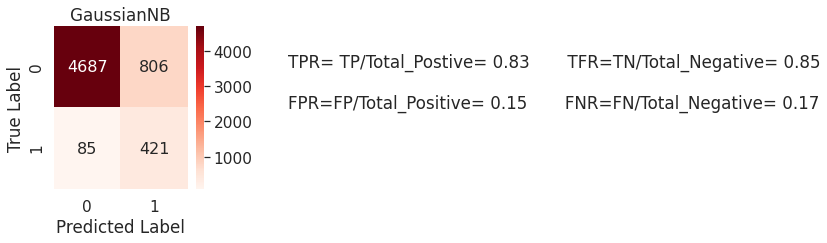

In [ ]:
plot_confusion_matrix(model_gaussian_nb,model_gaussian_nb_predictions)

In [ ]:
pickle.dump(model_gaussian_nb, open('gaussian_naive_bias.pickle', 'wb'))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_multinomial_nb=MultinomialNB()
model_multinomial_nb.fit(features_train,labels_train)
model_multinomial_nb_predictions=model_multinomial_nb.predict(features_test)
print('Accuracy',accuracy_score(labels_test,model_multinomial_nb_predictions))
print(classification_report(labels_test,model_multinomial_nb_predictions))

Accuracy 0.9281546924487415
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      5493
         1.0       0.90      0.17      0.28       506

    accuracy                           0.93      5999
   macro avg       0.92      0.58      0.62      5999
weighted avg       0.93      0.93      0.90      5999



In [ ]:
from sklearn.svm import SVC
model_svm=SVC(kernel='sigmoid',probability=True)
model_svm.fit(features_train,labels_train)
model_svm_predictions=model_svm.predict(features_test)
print('Accuracy',accuracy_score(labels_test,model_svm_predictions))
print(classification_report(labels_test,model_svm_predictions))

Accuracy 0.9248208034672445
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      5493
         1.0       0.57      0.45      0.50       506

    accuracy                           0.92      5999
   macro avg       0.76      0.71      0.73      5999
weighted avg       0.92      0.92      0.92      5999



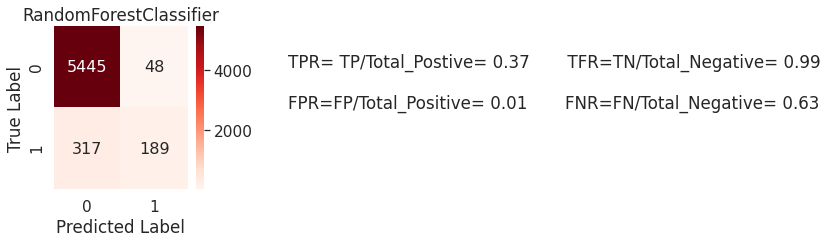

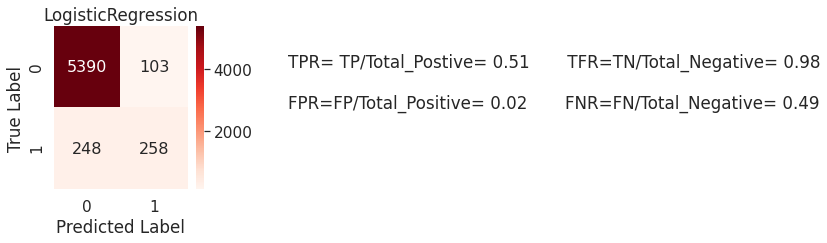

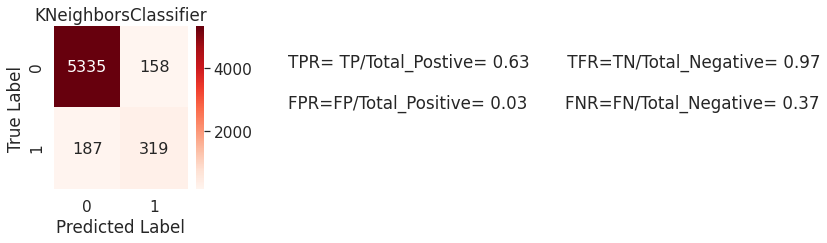

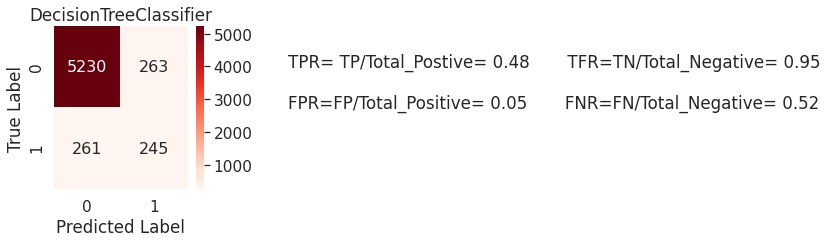

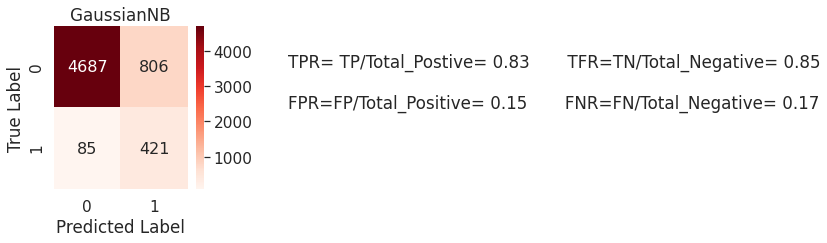

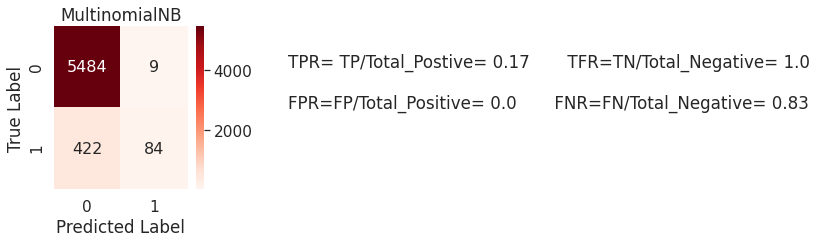

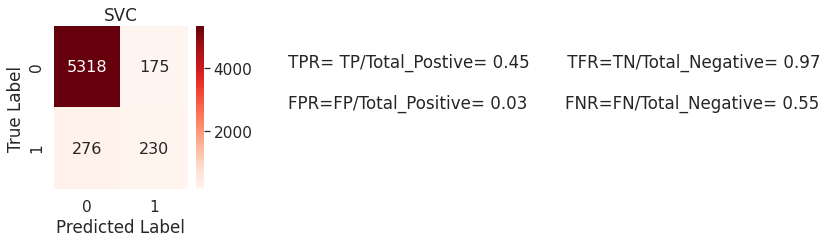

In [ ]:
plot_confusion_matrix(model_random_forest,model_random_forest_predictions)
plot_confusion_matrix(model_logistic_regression,model_logistic_regression_predictions)
plot_confusion_matrix(model_knn,model_knn_predictions)
plot_confusion_matrix(model_decision_tree,model_decision_tree_predictions)
plot_confusion_matrix(model_gaussian_nb,model_gaussian_nb_predictions)
plot_confusion_matrix(model_multinomial_nb,model_multinomial_nb_predictions)
plot_confusion_matrix(model_svm,model_svm_predictions)

# Applying Deep Learning 

In [ ]:
# import numpy as np
# from tensorflow.keras.preprocessing.text import one_hot
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.utils import to_categorical
# vocabulary_size=10000
# one_hot_representation=[one_hot(words,vocabulary_size) for words in data['Text_parsed']]
# sentence_length=100
# embedded_docs = pad_sequences(one_hot_representation,padding='pre',maxlen=sentence_length)
# X_final=np.array(embedded_docs)
# Y_final=data['category_target']

In [ ]:
# total_text='';
# for text in data['Text_parsed']:
#   total_text+=text

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# lb=LabelEncoder()
# print(lb.fit( word_tokenize(total_text)))
# print(lb.transform(word_tokenize(data['Text_parsed'][0])))

In [ ]:
# X_train_nn,X_test_nn,Y_train_nn,Y_test_nn=train_test_split(X_final,Y_final,test_size=.25,random_state=32)

In [ ]:
# (X_train_nn.shape,Y_train_nn.shape)

In [ ]:
# from tensorflow.keras.layers import Embedding
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Dropout

In [ ]:
# features_dimentions=100

In [ ]:
# model=Sequential()
# model.add(Embedding(vocabulary_size,features_dimentions,input_length=sentence_length))
# model.add(Dropout(.9))
# model.add(LSTM(60))
# model.add(Dropout(.9))
# model.add(Dense(1,activation='sigmoid'))

In [ ]:
# model.summary()

In [ ]:
# from tensorflow.keras.utils import plot_model
# plot_model(model,show_shapes=True)

In [ ]:
# from tensorflow.keras.callbacks import Callback

# class BanglaNewsClassificationCallaback(Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('accuracy') is not None and logs.get('accuracy')>0.97):
#             print("\nReached 97.0% accuracy so cancelling training!")
#             self.model.stop_training = True

In [ ]:
# from tensorflow.keras.losses import BinaryCrossentropy
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.callbacks import LearningRateScheduler
# checkpoint_path = "/content/drive/MyDrive/AI/training_2/political_post_detection.ckpt"
# try:
#   model.load_weights(checkpoint_path)
# except:
#   pass
# batch_size=64

# cp_callback =ModelCheckpoint(
#     filepath=checkpoint_path, 
#     verbose=0, 
#     save_weights_only=True,
#     save_freq=235,
#     )
# initial_learning_rate = 0.001
# epochs = 5
# decay = initial_learning_rate / epochs
# def lr_time_based_decay(epoch, lr):
#     return lr * 1 / (1 + decay * epoch)

# model.compile(
#      loss=BinaryCrossentropy(from_logits=False),
#       optimizer=Adam(learning_rate=initial_learning_rate,epsilon=1e-27), 
#       metrics=['accuracy']
#       )


# history=model.fit(
#     x=X_train_nn,
#     y=Y_train_nn,
#     batch_size=batch_size,
#     validation_data=(X_test_nn,Y_test_nn),
#     callbacks=[LearningRateScheduler(lr_time_based_decay, verbose=1),BanglaNewsClassificationCallaback(),cp_callback],
#     epochs=10,
#     verbose=1
#     )

In [ ]:
# train_loss,train_acc=model.evaluate(X_train_nn,Y_train_nn)
# val_loss, val_acc = model.evaluate(X_test_nn, Y_test_nn)

In [ ]:
# print("Training Loss : ",train_loss)
# print("Training Acc : ",train_acc)
# print("Validation Loss : ",val_loss)
# print("Validation Accuracy : ",val_acc) 
# print(history.history.keys())
# plt.rcParams['figure.figsize'] = [15, 7]
# fig,axs=plt.subplots(1,2)
# axs[0].plot(history.history['accuracy'])
# axs[0].plot(history.history['val_accuracy'])
# axs[0].set_title('model accuracy')
# axs[0].set(xlabel='epoch', ylabel='loss')
# axs[0].legend(['train', 'test'], loc='upper left')
# # summarize history for loss
# axs[1].plot(history.history['loss'])
# axs[1].plot(history.history['val_loss'])
# axs[1].set_title('model loss')
# axs[1].set(xlabel='epoch', ylabel='loss')
# axs[1].legend(['train', 'test'], loc='upper left')

In [ ]:
# model.save('bengali_news_classifier.h5')

In [ ]:
# lstm_pred=model.predict(X_test_nn, batch_size=32, max_queue_size=10,workers=1, use_multiprocessing=True)

# Confusion Matrix Analysis For LSTMS

In [ ]:
# from tensorflow.math import confusion_matrix
# confusion_matrix(Y_test_nn,lstm_pred,num_classes=2)

# Prediction Model Output From Input Text

In [ ]:
import time

In [ ]:
start_time = time.time()
text = "\u09B8\u09B0\u0995\u09BE\u09B0\u09C7\u09B0 \u0989\u09A8\u09CD\u09A8\u09DF\u09A8 \u09AD\u09C7\u0999\u09C7 \u09AA\u09DC\u09C7\u099B\u09C7 \u09AC\u09B2\u09C7 \u09AE\u09A8\u09CD\u09A4\u09AC\u09CD\u09AF \u0995\u09B0\u09C7\u099B\u09C7\u09A8 \u09AC\u09BF\u098F\u09A8\u09AA\u09BF \u09AE\u09B9\u09BE\u09B8\u099A\u09BF\u09AC \u09AE\u09BF\u09B0\u09CD\u099C\u09BE \u09AB\u0996\u09B0\u09C1\u09B2 \u0987\u09B8\u09B2\u09BE\u09AE \u0986\u09B2\u09AE\u0997\u09C0\u09B0\u0964 \u09AC\u09BF\u09AE\u09BE\u09A8\u09AC\u09A8\u09CD\u09A6\u09B0\u09C7\u09B0 \u0995\u09BE\u099B\u09C7 \u09A8\u09BF\u09B0\u09CD\u09AE\u09BE\u09A3\u09BE\u09A7\u09C0\u09A8 \u09AC\u09BE\u09B8 \u09B0\u200D\u09CD\u09AF\u09BE\u09AA\u09BF\u09A1 \u099F\u09CD\u09B0\u09BE\u09A8\u099C\u09BF\u099F (\u09AC\u09BF\u0986\u09B0\u099F\u09BF) \u09AA\u09CD\u09B0\u0995\u09B2\u09CD\u09AA\u09C7\u09B0 \u0997\u09BE\u09B0\u09CD\u09A1\u09BE\u09B0 \u09AA\u09DC\u09C7 \u09AF\u09BE\u0993\u09DF\u09BE\u09B0 \u0998\u099F\u09A8\u09BE\u09B0 \u0989\u09A6\u09BE\u09B9\u09B0\u09A3 \u09A6\u09BF\u09DF\u09C7 \u09A4\u09BF\u09A8\u09BF \u09AC\u09B2\u09C7\u099B\u09C7\u09A8, \u2018\u099C\u09A8\u0997\u09A3\u09C7\u09B0 \u099F\u09BE\u0995\u09BE \u09A8\u09BF\u09DF\u09C7 \u09AF\u09C7\u09B8\u09AC \u09A8\u09BF\u09B0\u09CD\u09AE\u09BE\u09A3 \u0995\u09B0\u09BE \u09B9\u099A\u09CD\u099B\u09C7, \u09B8\u09C7\u099F\u09BE \u09B9\u09A0\u09BE\u09CE \u09AD\u09C7\u0999\u09C7 \u09AA\u09DC\u099B\u09C7\u0964 \u09A4\u09BE\u09B0 \u09AE\u09BE\u09A8\u09C7 \u0995\u09C0 \u09B9\u099A\u09CD\u099B\u09C7?\u2019  \u0986\u099C \u09B0\u09CB\u09AC\u09AC\u09BE\u09B0 \u099C\u09BE\u09A4\u09C0\u09DF \u09AA\u09CD\u09B0\u09C7\u09B8\u0995\u09CD\u09B2\u09BE\u09AC\u09C7 \u09B8\u09C8\u09DF\u09A6 \u09AE\u09CB\u09DF\u09BE\u099C\u09CD\u099C\u09C7\u09AE \u09B9\u09CB\u09B8\u09C7\u09A8 \u0986\u09B2\u09BE\u09B2 \u09B0\u099A\u09BF\u09A4 \u2018\u0995\u09C1\u09AA\u09BF \u09AC\u09BE\u09A4\u09BF\u09B0 \u0997\u09A3\u09A4\u09A8\u09CD\u09A4\u09CD\u09B0\u2019 \u09AC\u0987\u09DF\u09C7\u09B0 \u09AE\u09CB\u09DC\u0995 \u0989\u09A8\u09CD\u09AE\u09CB\u099A\u09A8 \u0985\u09A8\u09C1\u09B7\u09CD\u09A0\u09BE\u09A8\u09C7 \u09AE\u09BF\u09B0\u09CD\u099C\u09BE \u09AB\u0996\u09B0\u09C1\u09B2 \u098F\u09B8\u09AC \u0995\u09A5\u09BE \u09AC\u09B2\u09C7\u09A8\u0964" #@param {type:"string"}
# text=process_text(text)
text_for_pred=tfidf_new.fit_transform([text]).toarray()
model_gaussian_nb_predictions=model_gaussian_nb.predict_proba(text_for_pred)
class_probability=model_gaussian_nb_predictions.flatten()
print(class_probability)
post_type= lambda x: "Not Political" if x[0]>x[1]  else  "Political"
text=text.replace('\u0964','\u0964 \n')
print(text)
print(post_type(class_probability))
print("\n")
print("Execution time %s ms " % ((time.time() - start_time)*1000))

[2.51324665e-07 9.99999749e-01]
সরকারের উন্নয়ন ভেঙে পড়েছে বলে মন্তব্য করেছেন বিএনপি মহাসচিব মির্জা ফখরুল ইসলাম আলমগীর। 
 বিমানবন্দরের কাছে নির্মাণাধীন বাস র‍্যাপিড ট্রানজিট (বিআরটি) প্রকল্পের গার্ডার পড়ে যাওয়ার ঘটনার উদাহরণ দিয়ে তিনি বলেছেন, ‘জনগণের টাকা নিয়ে যেসব নির্মাণ করা হচ্ছে, সেটা হঠাৎ ভেঙে পড়ছে। 
 তার মানে কী হচ্ছে?’  আজ রোববার জাতীয় প্রেসক্লাবে সৈয়দ মোয়াজ্জেম হোসেন আলাল রচিত ‘কুপি বাতির গণতন্ত্র’ বইয়ের মোড়ক উন্মোচন অনুষ্ঠানে মির্জা ফখরুল এসব কথা বলেন। 

Political


Execution time 3.2024383544921875 ms 


In [ ]:
!ls -l -sh /content/

total 3.1G
1.1G -rw-r--r-- 1 root root 1.1G Mar 15 00:32 bangla-newspaper-dataset.zip
4.0K drwxr-xr-x 9 root root 4.0K Mar 15 00:37 bengali
4.0K drwxr-xr-x 2 root root 4.0K Mar 15 00:32 data
4.0K drwxr-xr-x 2 root root 4.0K Mar 15 00:33 data_v2
4.0K drwx------ 5 root root 4.0K Mar 15 00:32 drive
8.0K -rw-r--r-- 1 root root 6.9K Mar 15 00:46 gaussian_naive_bias.pickle
1.9G -rw-r--r-- 1 root root 1.9G Mar 15 00:35 political_post_data.csv
222M -rw-r--r-- 1 root root 222M Mar 15 00:38 political_post_data_parsed.csv
8.0K -rw-r--r-- 1 root root 4.9K Mar 15 00:35 ranksnl-bengali.txt
8.0K -rw-r--r-- 1 root root 4.9K Mar 15 00:37 ranksnl-bengali.txt.1
4.0K drwxr-xr-x 1 root root 4.0K Mar  5 14:37 sample_data


In [ ]:
!pip freeze

absl-py==0.10.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argon2-cffi==20.1.0
asgiref==3.3.1
astor==0.8.1
astropy==4.2
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.3.0
audioread==2.1.9
autograd==1.3
Babel==2.9.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.3.0
blis==0.4.1
bokeh==2.1.1
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.2.1
catalogue==1.0.0
certifi==2020.12.5
cffi==1.14.5
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.1
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.6
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.22
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.0
descartes==1.1.0
dill==0.3.3
distributed==1.25.3
Django==3.1.7
dlib==19.18.0
dm-tree==0.1.5
docopt==0.6.2
docutils=